# Определение стоимости недвижимости в Мск

In [1]:
import pandas as pd
from datetime import datetime

import numpy as np
from scipy import stats

import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Подготовка данных

In [3]:
df = pd.read_csv('../data/moscow.csv')

In [4]:
df

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,4704280,2018-03-04,12:35:25,55.621097,37.431002,3,2,1,25,1,31.7,6.0,11
1,8000000,2018-03-17,06:46:32,55.738876,37.825370,3,1,5,9,2,45.0,6.0,1
2,11500000,2018-04-03,17:40:53,55.798921,37.738090,3,1,14,16,3,64.9,8.0,1
3,10200000,2018-04-07,15:23:20,55.655307,37.614605,3,2,7,14,2,52.8,10.0,1
4,11500000,2018-04-18,21:52:41,55.701330,37.507412,3,1,14,17,1,42.0,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439506,12850000,2021-05-01,20:13:47,55.701280,37.642654,3,2,12,24,1,41.0,9.0,1
439507,19739760,2021-05-01,20:13:58,55.804736,37.750898,3,1,8,17,4,93.2,13.8,11
439508,12503160,2021-05-01,20:14:01,55.841415,37.489624,3,2,17,32,2,45.9,6.6,11
439509,11831910,2021-05-01,20:14:12,55.804736,37.750898,3,1,8,33,2,52.1,18.9,11


In [5]:
# df.to_pickle('data/all_df.pickle')
# df = pd.read_pickle('data/all_df.pickle')

In [5]:
print(f'df size = {df.shape}')

df size = (439511, 13)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439511 entries, 0 to 439510
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          439511 non-null  int64  
 1   date           439511 non-null  object 
 2   time           439511 non-null  object 
 3   geo_lat        439511 non-null  float64
 4   geo_lon        439511 non-null  float64
 5   region         439511 non-null  int64  
 6   building_type  439511 non-null  int64  
 7   level          439511 non-null  int64  
 8   levels         439511 non-null  int64  
 9   rooms          439511 non-null  int64  
 10  area           439511 non-null  float64
 11  kitchen_area   439511 non-null  float64
 12  object_type    439511 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 43.6+ MB


In [7]:
df.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,4.395110e+05,439511.000000,439511.000000,439511.0,439511.000000,439511.000000,439511.000000,439511.000000,439511.000000,439511.000000,439511.000000
mean,1.313957e+07,55.721659,37.577732,3.0,1.846659,8.510465,16.305155,1.820940,58.111338,11.983181,5.292771
std,1.945564e+07,0.107314,0.146706,0.0,0.792431,6.464976,7.535946,1.160408,36.085213,6.651784,4.949736
min,-2.089967e+09,55.179939,36.836900,3.0,0.000000,1.000000,1.000000,-2.000000,1.400000,0.100000,1.000000
25%,6.962944e+06,55.642083,37.479919,3.0,1.000000,3.000000,10.000000,1.000000,38.900000,8.000000,1.000000
50%,9.350000e+06,55.725486,37.575703,3.0,2.000000,7.000000,16.000000,2.000000,53.000000,10.500000,1.000000
75%,1.350000e+07,55.803803,37.682966,3.0,2.000000,12.000000,22.000000,3.000000,70.000000,15.000000,11.000000
max,1.096745e+09,56.655467,38.059246,3.0,5.000000,39.000000,39.000000,10.000000,5200.000000,1200.000000,11.000000


In [8]:
df.describe(include='object')

,date,time
count,439511,439511
unique,986,72200
top,2018-12-31,16:15:49
freq,6439,75


In [9]:
df.isna().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

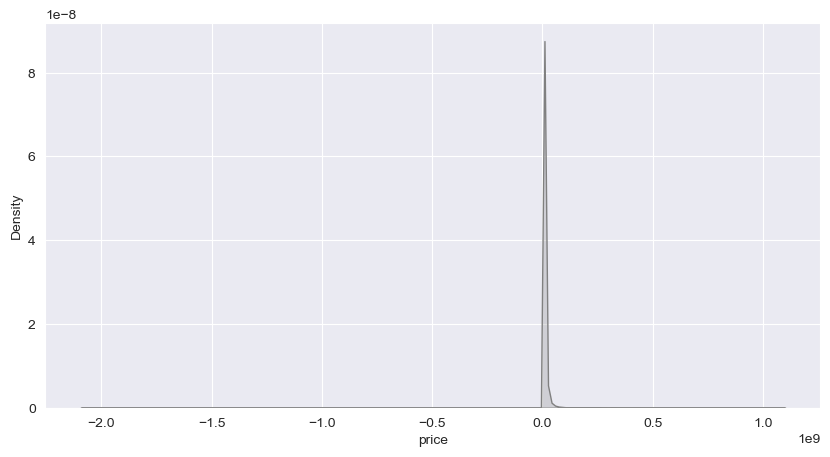

In [15]:
plt.figure(figsize=(10, 5))

sns.kdeplot(df['price'], fill=True, color='grey')
plt.show()

Text(0.5, 1.0, 'Распределение целевой переменной Price')

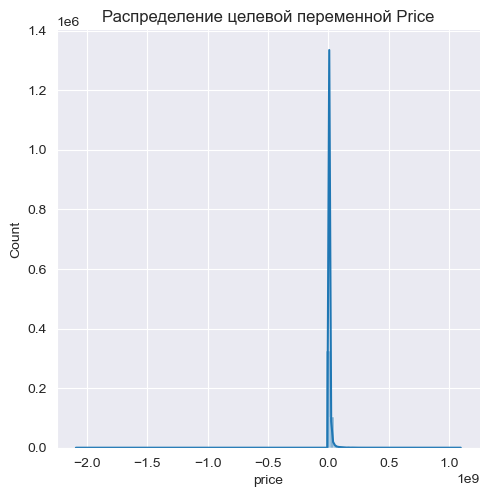

In [16]:
sns.displot(df.price, bins=100, kde=True)
plt.title('Распределение целевой переменной Price')

In [18]:
print(stats.shapiro(df.price))

ShapiroResult(statistic=0.31767481565475464, pvalue=0.0)


In [19]:
df = df.assign(log_price=np.log(df.price + 1))

Text(0.5, 1.0, 'Распределение целевой переменной log_price')

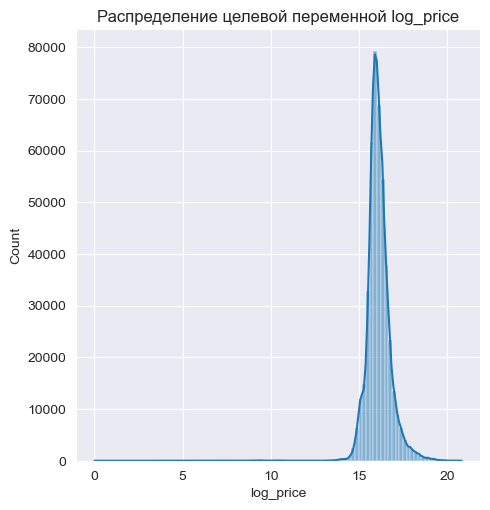

In [20]:
sns.displot(df.log_price, bins=100, kde=True)
plt.title('Распределение целевой переменной log_price')

In [21]:
print(stats.shapiro(df.log_price))

ShapiroResult(statistic=nan, pvalue=1.0)


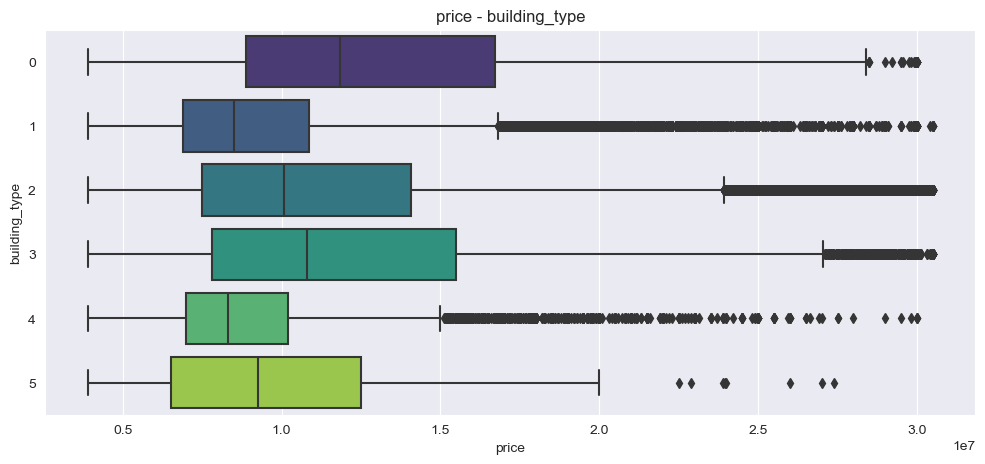

In [29]:
plt.figure(figsize=(12, 5))

sns.boxplot(data=df,
            x='price',
            y='building_type',
            orient="h",
            palette='viridis')
plt.title('price - building_type')
plt.show()

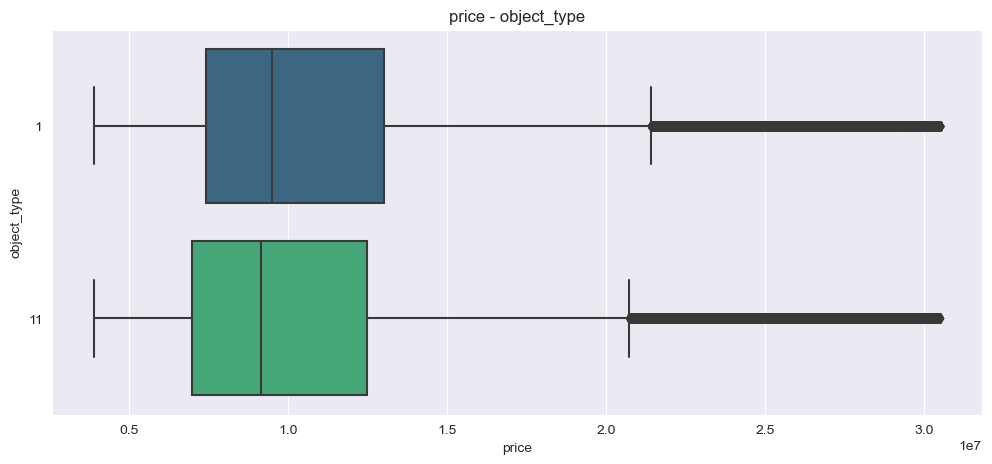

In [30]:
plt.figure(figsize=(12, 5))

sns.boxplot(data=df,
            x='price',
            y='object_type',
            orient="h",
            palette='viridis')
plt.title('price - object_type')
plt.show()

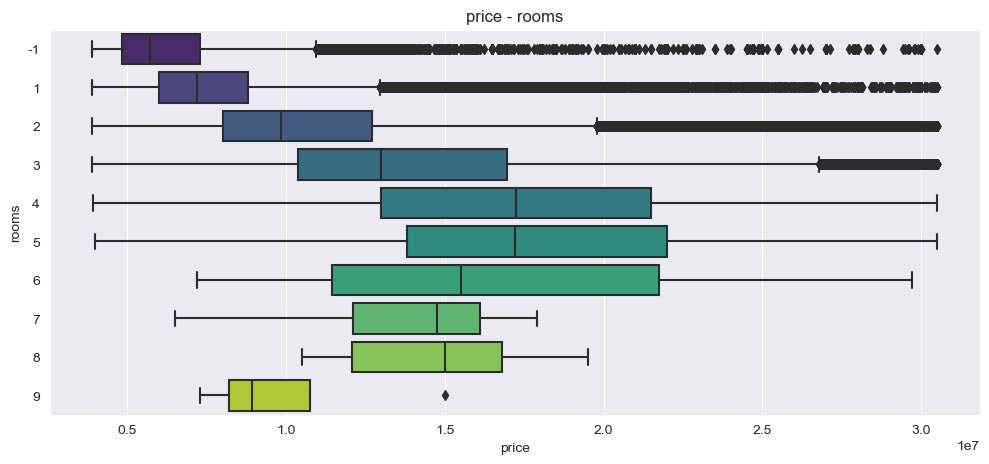

In [31]:
plt.figure(figsize=(12, 5))

sns.boxplot(data=df,
            x='price',
            y='rooms',
            orient="h",
            palette='viridis')
plt.title('price - rooms')
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387929 entries, 0 to 439510
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          387929 non-null  int64  
 1   building_type  387929 non-null  int64  
 2   level          387929 non-null  int64  
 3   levels         387929 non-null  int64  
 4   rooms          387929 non-null  int64  
 5   area           387929 non-null  float64
 6   kitchen_area   387929 non-null  float64
 7   object_type    387929 non-null  int64  
 8   log_price      387929 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 37.7 MB


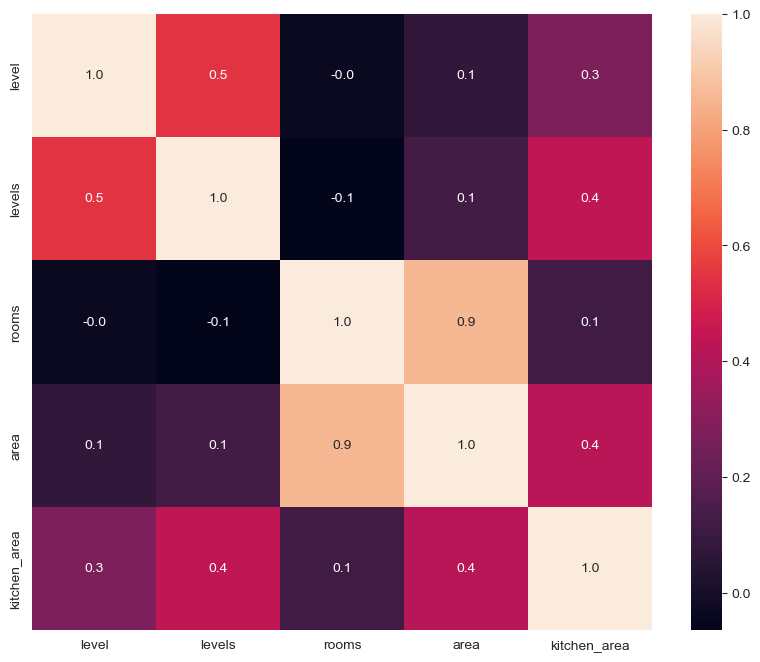

In [33]:
num_cols = ["level", "levels", "rooms", "area", "kitchen_area"]
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(method='spearman'), annot=True, fmt=".1f");

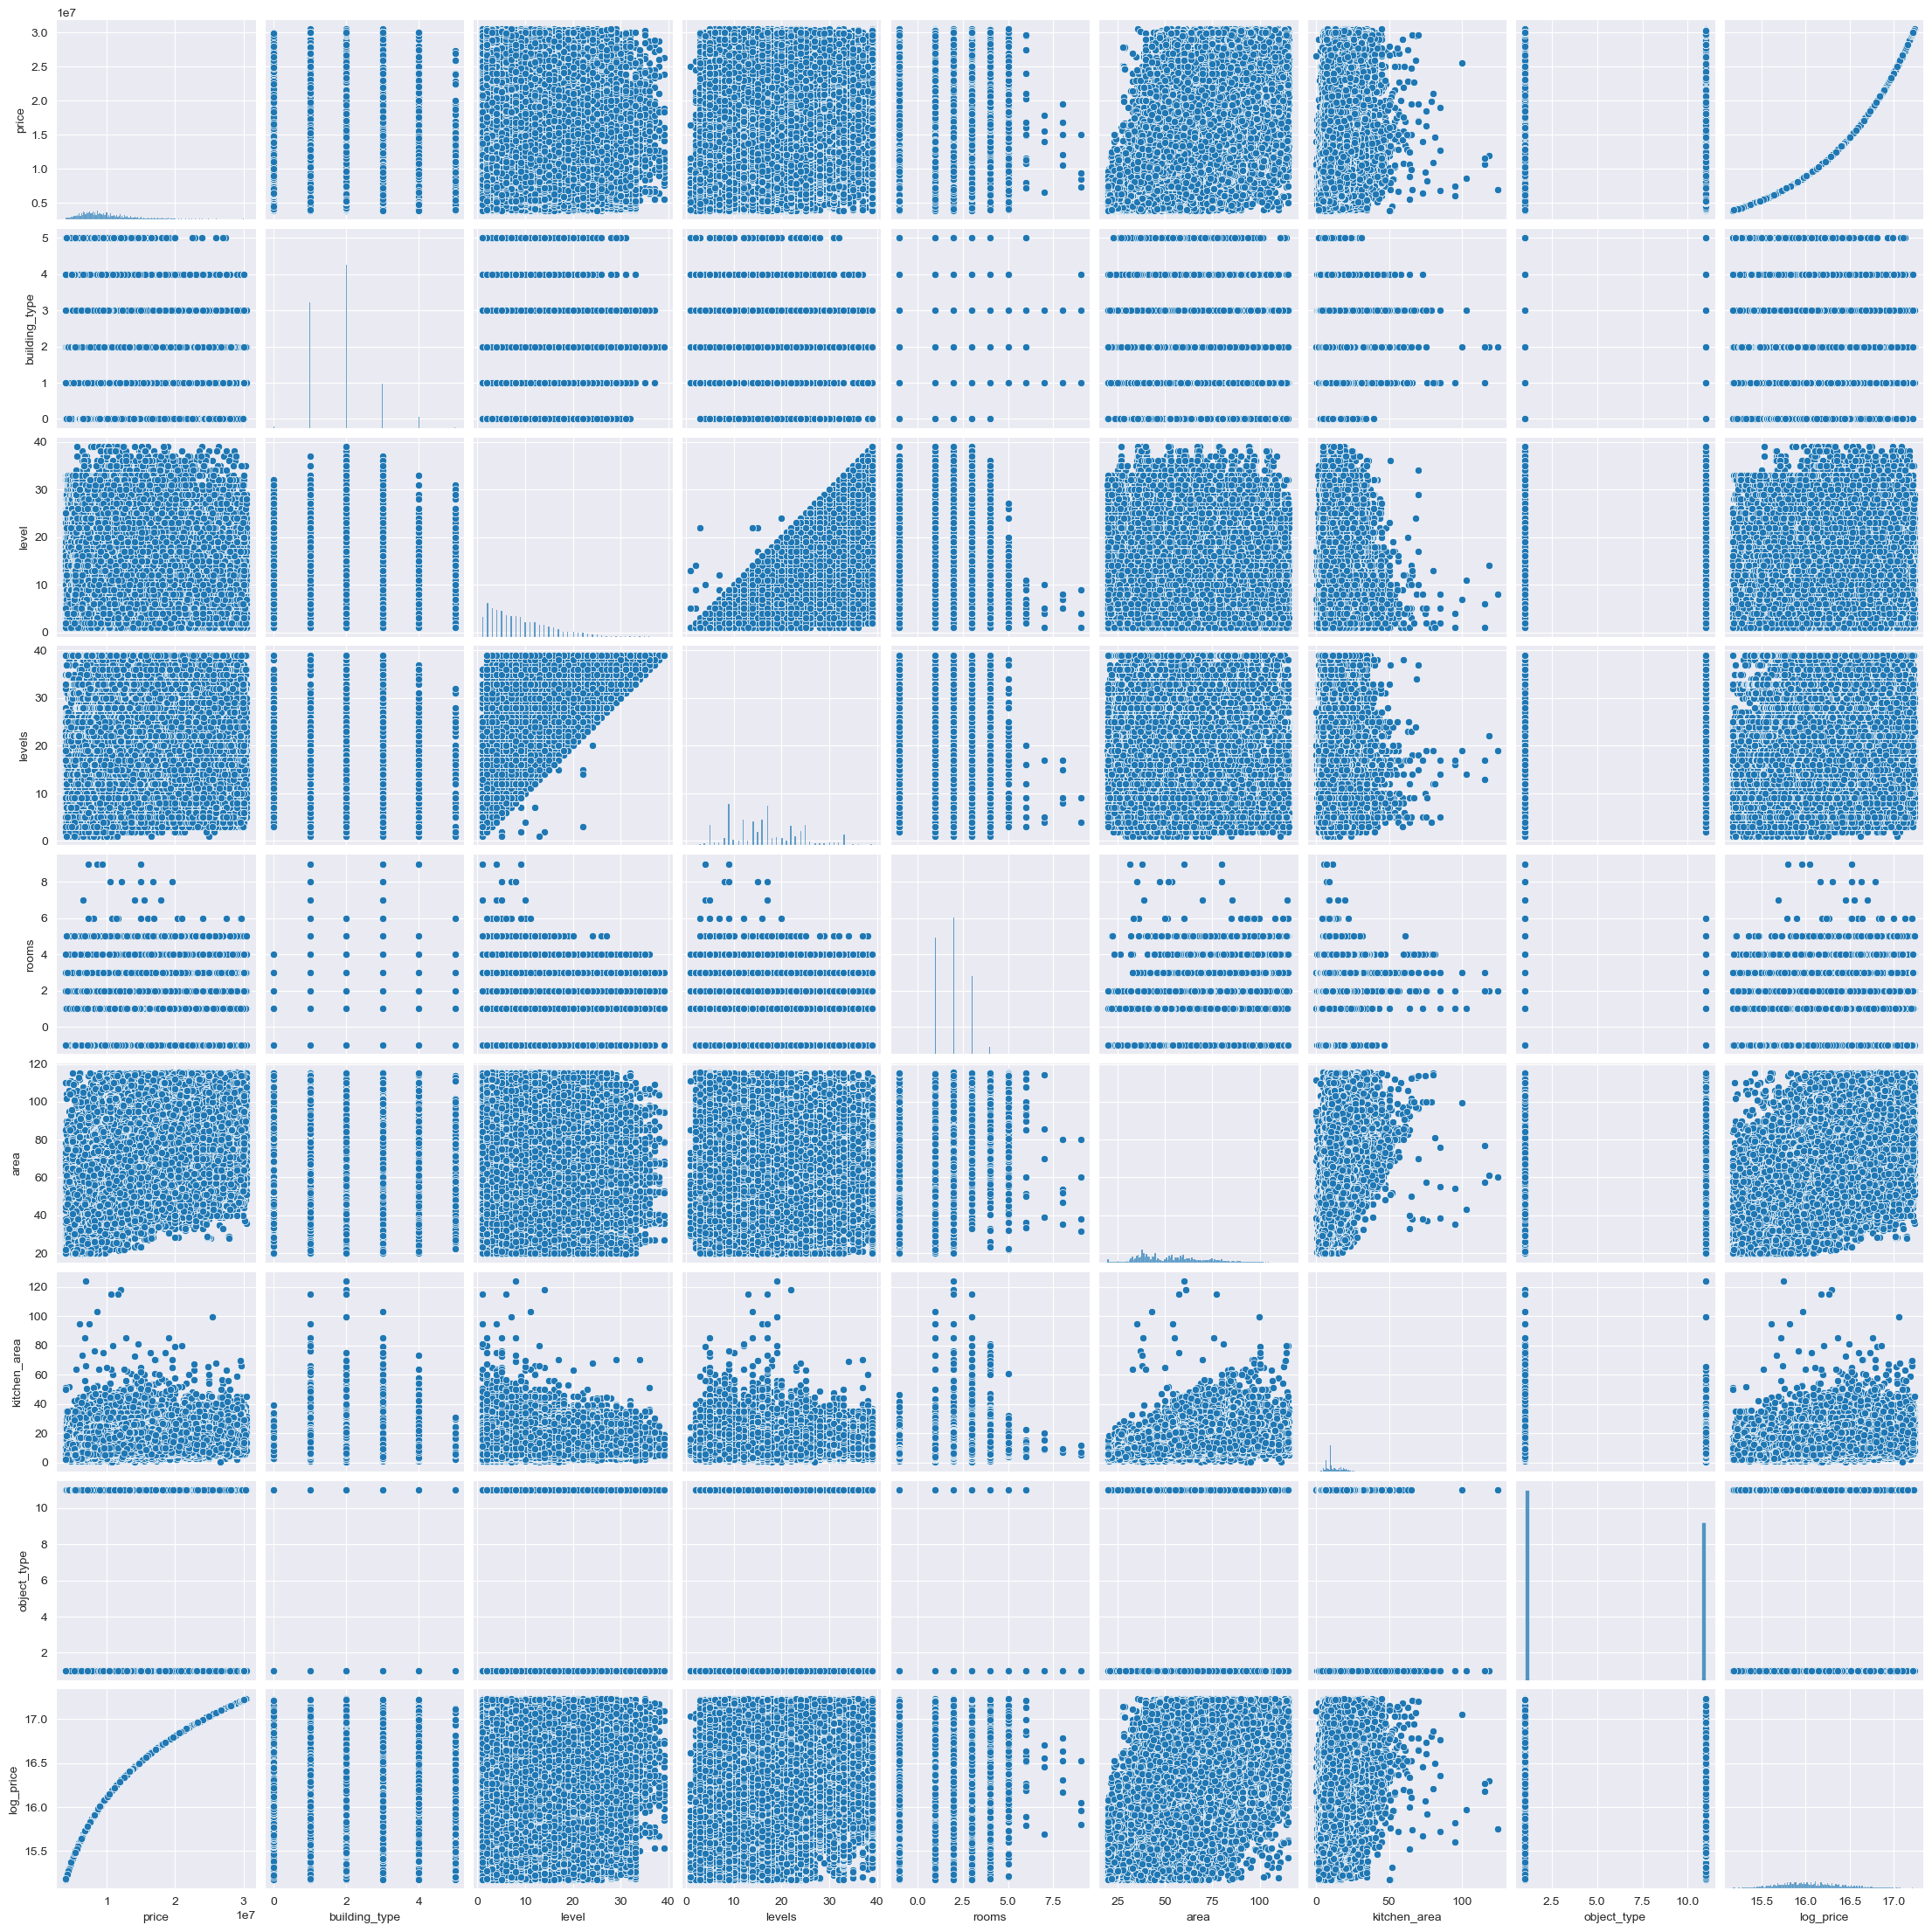

In [34]:
sns.pairplot(df)

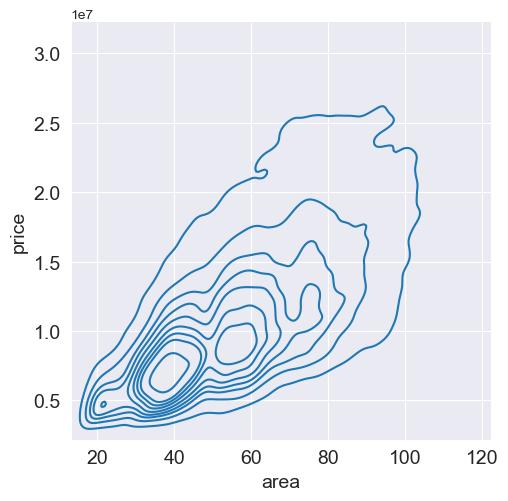

In [35]:
sns.displot(df, x='area', y='price', kind="kde", common_norm=False)

plt.xlabel('area', fontsize=14)
plt.ylabel('price', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

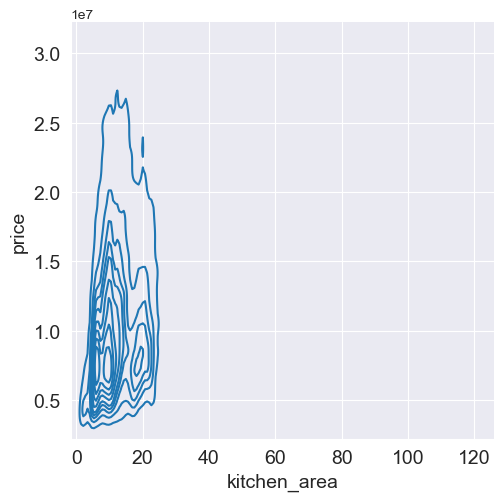

In [36]:
sns.displot(df, x='kitchen_area', y='price', kind="kde", common_norm=False)

plt.xlabel('kitchen_area', fontsize=14)
plt.ylabel('price', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);